In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import dataloader
import omr
import os
import matplotlib.pyplot as plt
import numpy as np

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [11]:
#PATH = "C:\\Users\\hitts\\Documents\\GitHub\\piano"
PATH = "C:\\Users\\hitts\\Desktop"
BATCH_SIZE = 2
VAL_SIZE = 0.2

In [15]:
dl = dataloader.DataLoader(path=PATH, batch_size=BATCH_SIZE, val_size=VAL_SIZE, shuffle=False, verbose=True)
train_ds, val_ds = dl.get_ds()

Loaded 14 images.
Training dataset created: 10 images, 5 batches of size 2.
Validation dataset created: 2 images, 1 batches of size 2.


In [16]:
images, labels = next(iter(train_ds))

In [17]:
print(images.shape, labels.shape)

(2, 226, 1320, 1) (2, 65)


In [18]:
batch_idx = 0
image = images[batch_idx, :, :, :]
label = labels[batch_idx, :]

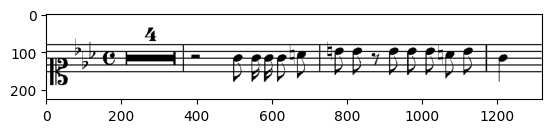

In [19]:
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

In [20]:
alphabetic_label = dl.decode_numerical_label(label.numpy())
print(alphabetic_label)

['clef-C1', 'keySignature-EbM', 'timeSignature-C', 'multirest-4', 'barline', 'rest-half', 'note-G4_eighth', 'note-G4_sixteenth', 'note-G4_sixteenth', 'note-G4_eighth', 'note-A4_eighth', 'barline', 'note-B4_eighth', 'note-Bb4_eighth', 'rest-eighth', 'note-Bb4_eighth', 'note-Bb4_eighth', 'note-Bb4_eighth', 'note-A4_eighth', 'note-Bb4_eighth', 'barline', 'note-G4_quarter']


In [21]:
model = omr.get_model(len(dl.get_alphabet()))
model.summary()

Model compiled.
Model: "Optical Music Recognition Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 226, 1320, 1)]    0         
                                                                 
 conv2d (Conv2D)             (None, 226, 1320, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 226, 1320, 32)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 226, 1320, 64)     18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 226, 1320, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D) 